<a href="https://colab.research.google.com/github/harttaylor/Modelling-Class/blob/main/GLMexcercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The occupancy of Black-throated Green Warbler (presence/absence) will increase as the distance to edges (such as seismic lines) increases.

y
 =β
0
​
 +β
1
​
 ×Distance to Edges

Where:


y is the respnse variable (will be probability of occupancy)


β
0
​
  is the intercept.

β
1
​
  is the coefficient for the effect of distance to edges.

In [1]:
# Simulate data
set.seed(42)  # For reproducibility
n <- 100  # Number of data points

# Simulate distance to edges
distance_to_edges <- runif(n, min = 0, max = 1000)

# Simulate occupancy
beta_0 <- -3  # Intercept
beta_1 <- 0.005  # Coefficient for distance
logit_p <- beta_0 + beta_1 * distance_to_edges
p <- 1 / (1 + exp(-logit_p))  # Convert log-odds to probability
occupancy <- rbinom(n, 1, p)

# Create a data frame
data <- data.frame(Distance_to_Edges = distance_to_edges, Occupancy = occupancy)
head(data)

,Distance_to_Edges,Occupancy
,<dbl>,<int>
1,914.8060,1
2,937.0754,1
3,286.1395,0
4,830.4476,1
5,641.7455,0
6,519.0959,1


In [2]:
# Run using GLM
library(stats)

model <- glm(Occupancy ~ Distance_to_Edges, family = binomial(link = "logit"), data = data)
summary(model)


Call:
glm(formula = Occupancy ~ Distance_to_Edges, family = binomial(link = "logit"), 
    data = data)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -4.281922   0.852597  -5.022 5.11e-07 ***
Distance_to_Edges  0.007019   0.001334   5.263 1.42e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.66  on 99  degrees of freedom
Residual deviance:  82.66  on 98  degrees of freedom
AIC: 86.66

Number of Fisher Scoring iterations: 5


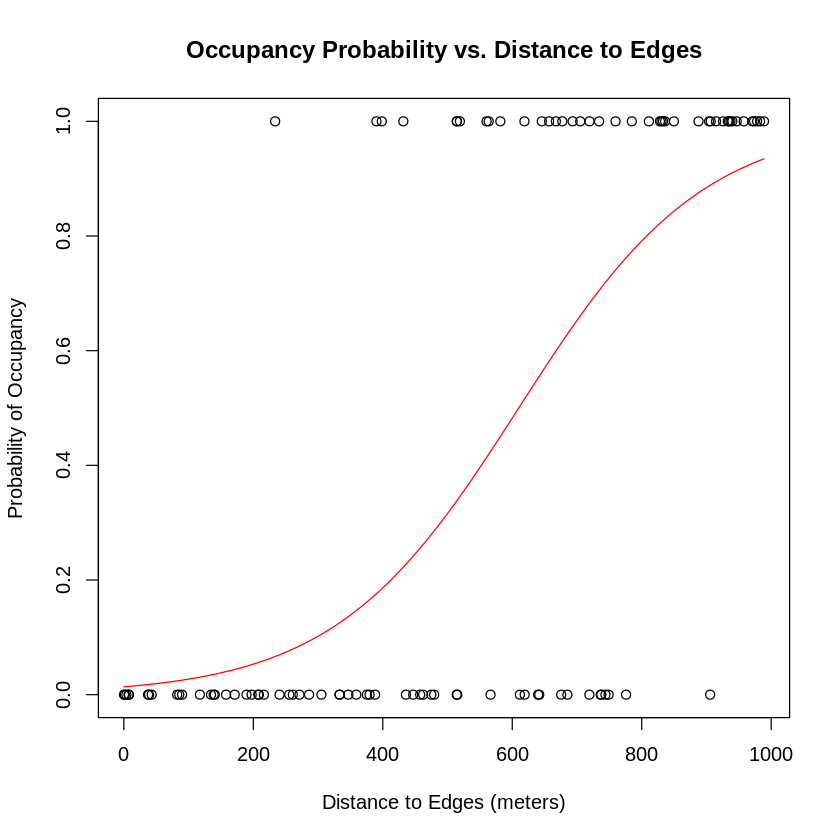

In [3]:
# Plotting the results
plot(data$Distance_to_Edges, data$Occupancy, xlab = "Distance to Edges (meters)", ylab = "Probability of Occupancy", main = "Occupancy Probability vs. Distance to Edges")
curve(predict(model, data.frame(Distance_to_Edges = x), type="response"), add = TRUE, col = "red")


In [4]:
# Log-likelihood and AIC
logLik(model)
AIC(model)


'log Lik.' -41.33012 (df=2)

[1] 86.66024